# Model Checking


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from load_utils import *

In [2]:
d = load_diffs(keep_diff = True)
df_events, df_blocked_user_text = load_block_events_and_users()

### Q: How does the distribution over attack probabilities compare across annotators vs models?

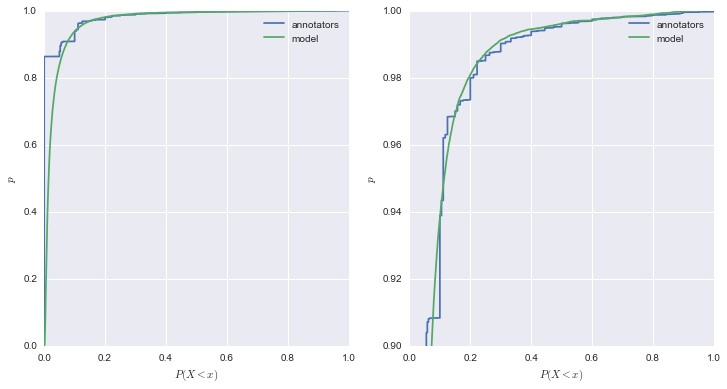

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 1. * np.arange(len(xa)) / (len(xa) - 1)

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 1. * np.arange(len(xm)) / (len(xm) - 1)

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$P(X<x)$')
ax1.set_ylabel('$p$')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$P(X<x)$')
ax2.set_ylabel('$p$')
ax2.set_ylim((0.90, 1))
ax2.legend()

Model does not assign 0 scores, like the annotators.
Model score distribution is skewed left for x > 0.2.

### Q: How do differences in distribution over attack probabilities between annotators and models impact estomates of prevalence of personal attacks?

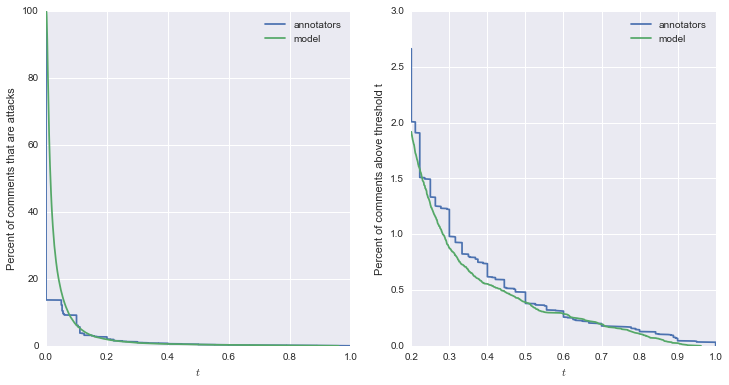

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 6))

xa = np.sort(d['annotated']['recipient_score'])
ya = 100 * (1 - (1. * np.arange(len(xa)) / (len(xa) - 1)))

xm = np.sort(d['annotated']['pred_recipient_score'])
ym = 100 * (1 - (1. * np.arange(len(xm)) / (len(xm) - 1)))

ax1 = fig.add_subplot(121)
ax1.plot(xa, ya, label = 'annotators')
ax1.plot(xm, ym, label = 'model')
ax1.set_xlabel('$t$')
ax1.set_ylabel('Percent of comments that are attacks')
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.plot(xa, ya, label = 'annotators')
ax2.plot(xm, ym, label = 'model')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Percent of comments above threshold t')
ax2.set_ylim((0.0, 3))
ax2.set_xlim((0.2, 1.0))
ax2.legend()
plt.savefig('../../paper/figs/model_vs_annotator_percent_attack_distributions.png')

### Q: What do comments in different score intervals look like?

In [5]:
def check_range(d, col, min, max, n = 10, ):
    df = d.query('%s >= %f and %s <= %f' % (col, min, col, max))
    for i, r in df.sample(n).iterrows():
        print(r[col])
        print(r.clean_diff)
        print('\n')  

In [6]:
check_range(d['sample'], 'pred_aggression_score',0.5, 0.6)

0.5506417751312256
 CAVEAT EMPTOR 
Don't bother adding anything to any articles or starting one for that matter.  It will be destroyed by hackers and wannabes.  Let someone else do the work for you.  That way you still have access to the information but you haven't wasted days of your life that you will never get back expecting people to appreciate what you have done only to see your efforts pissed away.

Wikipedia sucks!

Again: Me


0.558201014995575
All right...though that still doesn't mean it needs to be romanized as Kiess. Each one has equal right, so you can't bitch and moan when I change it.


0.5019830465316772
BLOCK THIS USER FROM WIKIPEDIA RIGHT NOW! HE IS VANDALIZING US!


0.5488541126251221
 FEAR - TOTAL BULLSHIT, Vanja ´s father is half Italian half croat, but his mother is a Serb and he was grew up in Serbia. Djoković mother was born in Croatia butr she is a Serbian


0.5056269168853761
 You did it again: 

Feng Sushi. Incomplete AfD nom. Slow down, man! 666 


0.5346584

### Q: How does the distribution over aggression scores compare across annotators vs models and different data sets

Plot kernel density estimate of aggression score distribution. This is mainly a sanity check that the aggression model is working new data

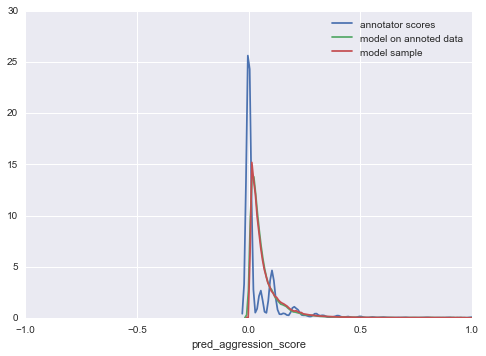

In [7]:
# annotations
sns.distplot(d['annotated']['aggression_score'].dropna(), hist=False, label = 'annotator scores')

# model on annotated data
sns.distplot(d['annotated']['pred_aggression_score'].dropna(), hist=False, label = 'model on annoted data')

#model no admin sample
sns.distplot(d['sample']['pred_aggression_score'].dropna(), hist=False, label = 'model sample')

plt.xlim(-1, 1)
plt.legend()

### Q: How does the distribution over attack probabilities compare across annotators vs models and different data sets

This is mainly a sanity check that the attack model is working new data

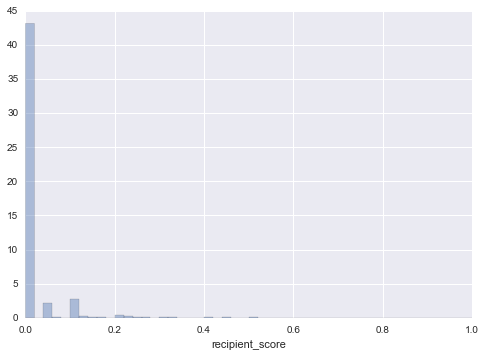

In [8]:
sns.distplot(d['annotated']['recipient_score'].dropna(), kde =False, norm_hist = True)

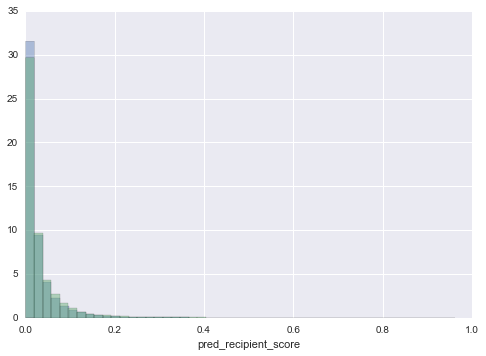

In [9]:
sns.distplot(d['annotated']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)
sns.distplot(d['sample']['pred_recipient_score'].dropna(), kde =False, norm_hist = True)